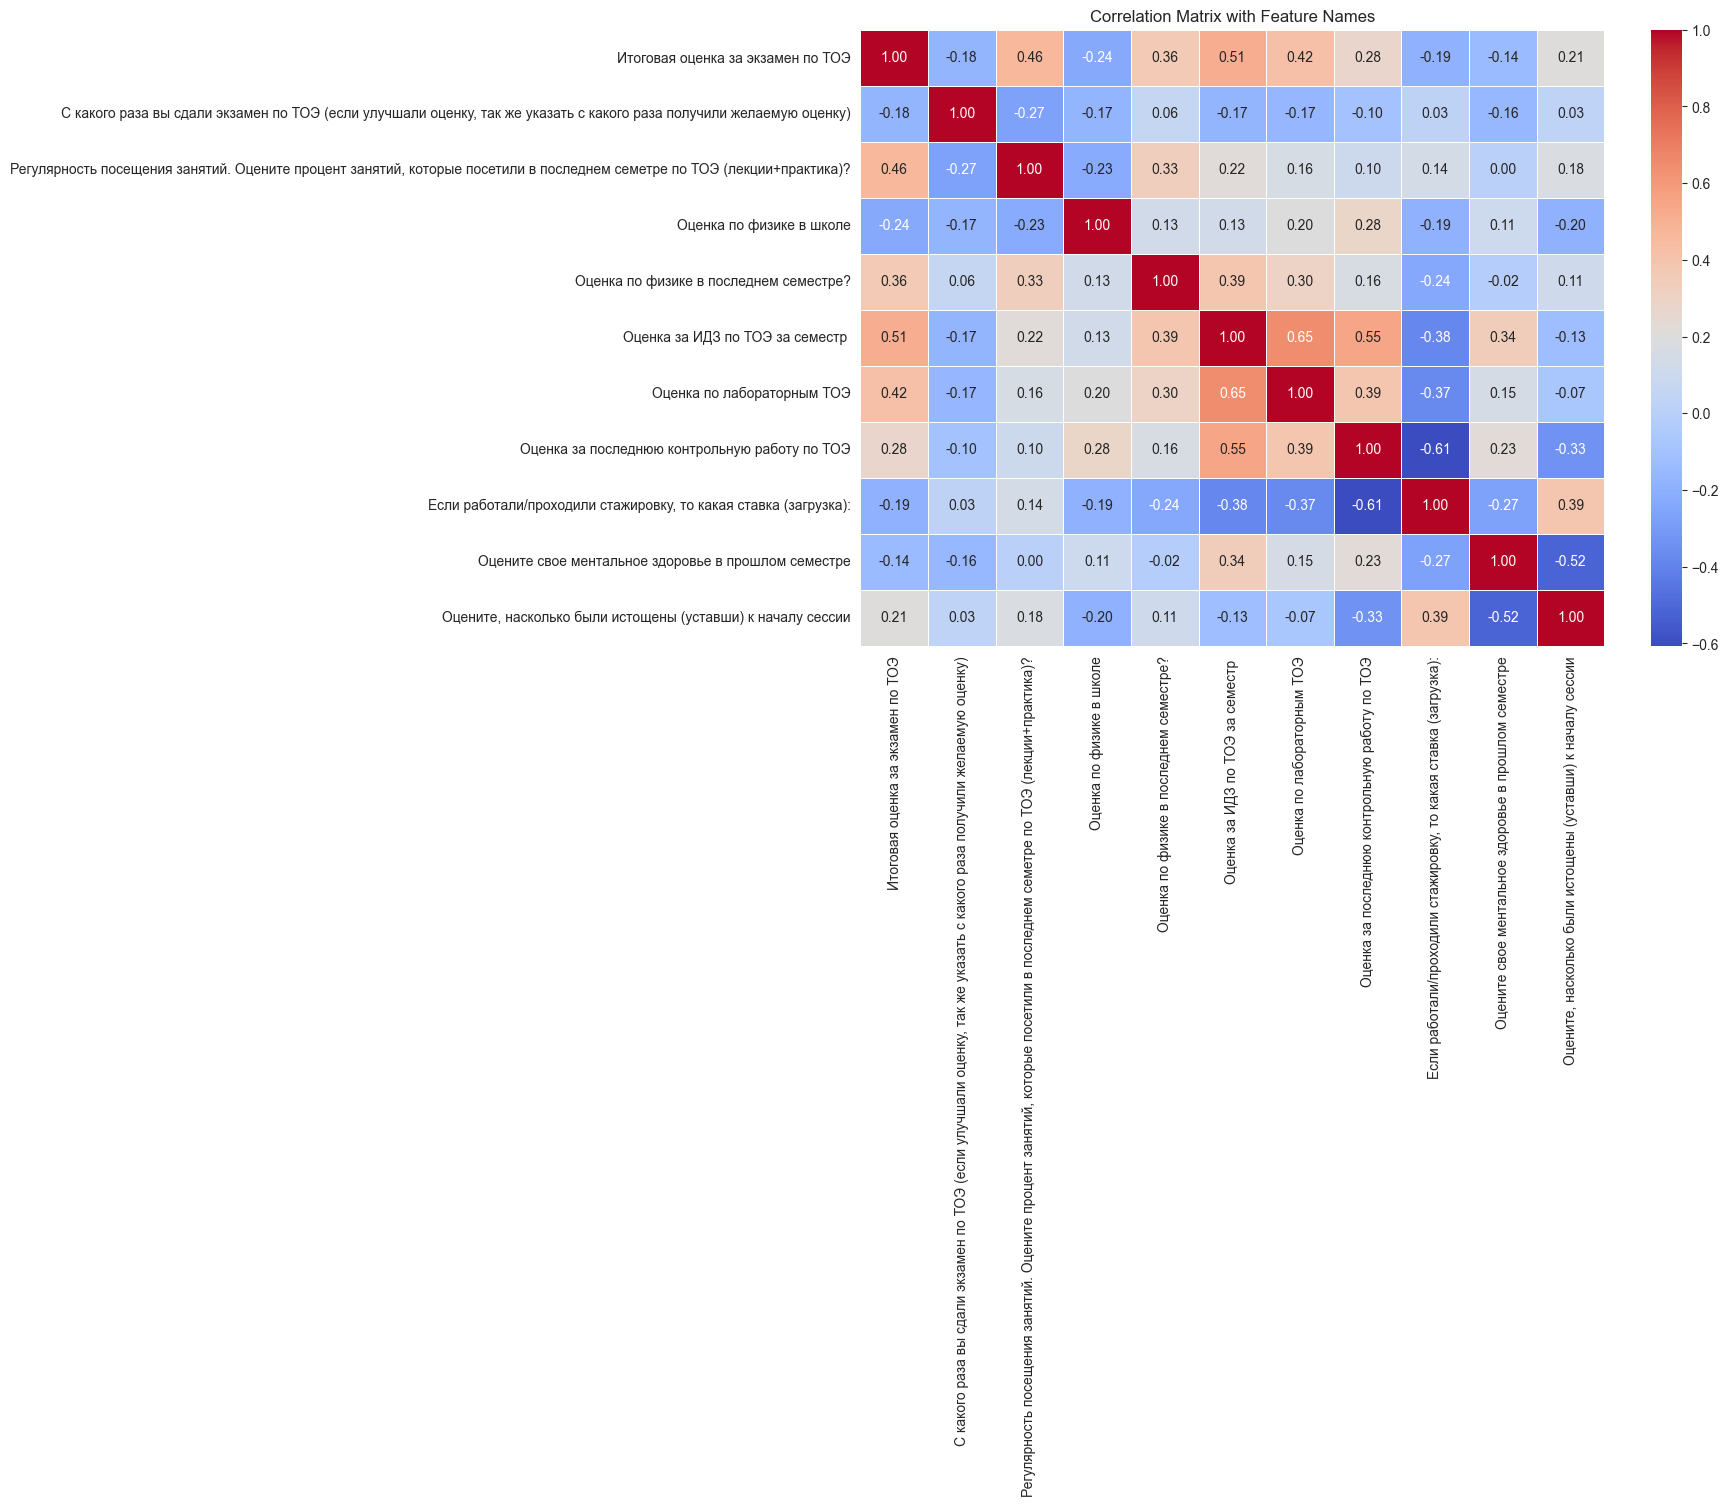

Mean Squared Error: 1.4753048400495603
R² Score: -0.13878287905526854


In [7]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('dataset.csv')
df = df.drop(columns=['Отметка времени'])

df1 = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix with Feature Names')
plt.show()

# Разделение данных на обучающую и тестовую выборки
df2 = df[df['С какого раза Dы сдали экзамен по ТОЭ (если улучшали оценку, так же указать с какого раза получили желаемую оценку)'] == 1]
df2 = df2.dropna()
num_col = df2.select_dtypes(include=[np.number]).columns
scale = StandardScaler()
df3 = pd.DataFrame(scale.fit_transform(df2[num_col]), columns=num_col)

# Определение признаков и целевой переменной
X = df3.drop(columns=['Итоговая оценка за экзамен по ТОЭ'])
y = df3['Итоговая оценка за экзамен по ТОЭ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

import pickle

# Сохранение модели
with open('model_linear_regression_example.pkl', 'wb') as file:
    pickle.dump(model, file)